In [69]:
from scipy import stats
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler

import mlflow
from mlflow.client import MlflowClient

In [70]:
df = pd.read_csv('.\data\menu.csv')
df.shape

(260, 24)

In [71]:
df.isna().sum() #valores Nan

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [72]:
df.isnull().sum() #valores nulos

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [73]:
df.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [74]:
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

## RESUMEN

- Contiene 260 muestras
- 24 Features
- 21 datos numéricos, 3 continuos y el resto discretos
- 2 datos categóricos
- 1 dato compuesto
- Cada muestra es un item por lo cuál demuestra cardinalidad.
- Sin datos Nan ni datos nulos

## Identificación de datos

- **Category:** Es un dato categórico que representa una ca que Grupo principal del menú pertenece el ítem, existen **9 clases** en este feature
- **Ítem**: Es un dato descriptivo, Nombre propio de cada producto
- **Serving** Size: Dato compuesto que representa numéricamente el peso de cada ítem. Al tener medidas en oz, fl oz, implícitamente nos puede indicar si es alimento sólido o líquido.)

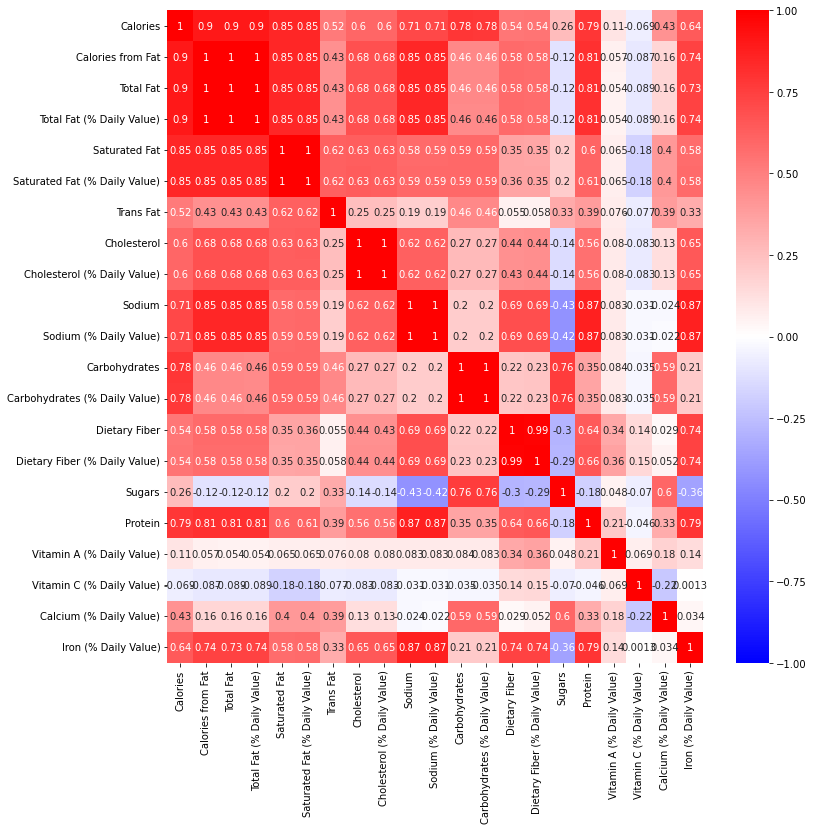

In [75]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.bwr, vmin=-1, vmax=1)
plt.show()

In [76]:
print(pd.value_counts(df['Category'], sort = True))

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


In [77]:
df.columns.tolist()

['Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

# TRATAMIENTO DE DATOS COMPUESTOS (INGENIERÍA DE FEATURES)
- Se toma el feature **Serving Size** para aislar sus valores en oz. Sin embargo, al contener oz y oz fl, se realiza un One Hot Enconding manual, agregando dos features nuevos (**Liquid**, **Solid**)
- Se realiza el borrado de caracteres dentro del feature **Serving Size**

In [78]:
df2 = df
df2['Liquid'] = np.where(df2['Serving Size'].str.contains('cup')==True, 1, 0)
df2['Solid'] = np.where(df2['Serving Size'].str.contains('g')==True, 1, 0)

df2 = df2.reindex(columns=['Category', 'Item', 'Serving Size', 'Solid', 'Liquid', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'])

df2['Serving Size'] = df2['Serving Size'].replace({'cup':'', 'g':'', 'oz':'', 'fl':'','\(':'', '\)':''}, regex=True)
X = df2["Serving Size"].str.split(' ', expand=True)
df2['Serving Size'] = X[0].astype(dtype=float)

df2.head(200)

,Category,Item,Serving Size,Solid,Liquid,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8,1,0,300,120,13.0,20,5.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8,1,0,250,70,8.0,12,3.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9,1,0,370,200,23.0,35,8.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7,1,0,450,250,28.0,43,10.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7,1,0,400,210,23.0,35,8.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Coffee & Tea,Hot Chocolate with Nonfat Milk (Large),20.0,0,1,400,35,3.5,6,2.5,...,74,25,1,5,69,19,25,0,60,8
196,Coffee & Tea,Regular Iced Coffee (Small),16.0,0,1,140,40,4.5,7,3.0,...,23,8,0,0,22,1,4,0,4,0
197,Coffee & Tea,Regular Iced Coffee (Medium),22.0,0,1,190,60,7.0,11,4.5,...,31,10,0,0,30,1,4,0,4,0
198,Coffee & Tea,Regular Iced Coffee (Large),32.0,0,1,270,80,9.0,14,6.0,...,47,16,0,0,45,2,6,0,8,0


# EXPLORACIÓN DE DATOS

## Variables de entrada:
- Se identifica a través de histogramas y boxplot, la distribución de todas las muestras. Se encuentra que las distribuciones tienden a ser normalizadas en algunos features pero con un alto positive skew o varios valores en cero, se identificó que las categorias líquidas afectan la distribución.
- Se realiza separación de dataset líquidos y sólidos para verificar correlación 

## Variables de salida:

### - Para calcular calorías: (Modelo de regresión líneal múltiple)
- Se selecciona feature **Calories** como target.
- Se tomaran features visualizados en distribución de sólidos con una distribución normal.

### - Para determinar categoría a la cuál pertenece: (Varios Modelos de clasificación)
- Se selecciona Festure **Category**. el dataset está desbalanceado siendo este su target.
- Se tomarán features visualizados en solidos con distribución uniforme que estén indicados como % diario

In [79]:
### SEPARACIÓN DE DATASET LIQUIDOS Y SOLIDOS

df_liquid = df2[df2['Liquid']==1] 
df_solid = df2[df2['Solid']==1]


In [80]:
##TOMAR DATOS POR GRAMOS

#X = df_solid["Serving Size"].str.split(' ', expand=True)
#df_solid['Serving Size'] = X[2].astype(dtype=float)

#df_solid.head(200)


In [81]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10), bins=20)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

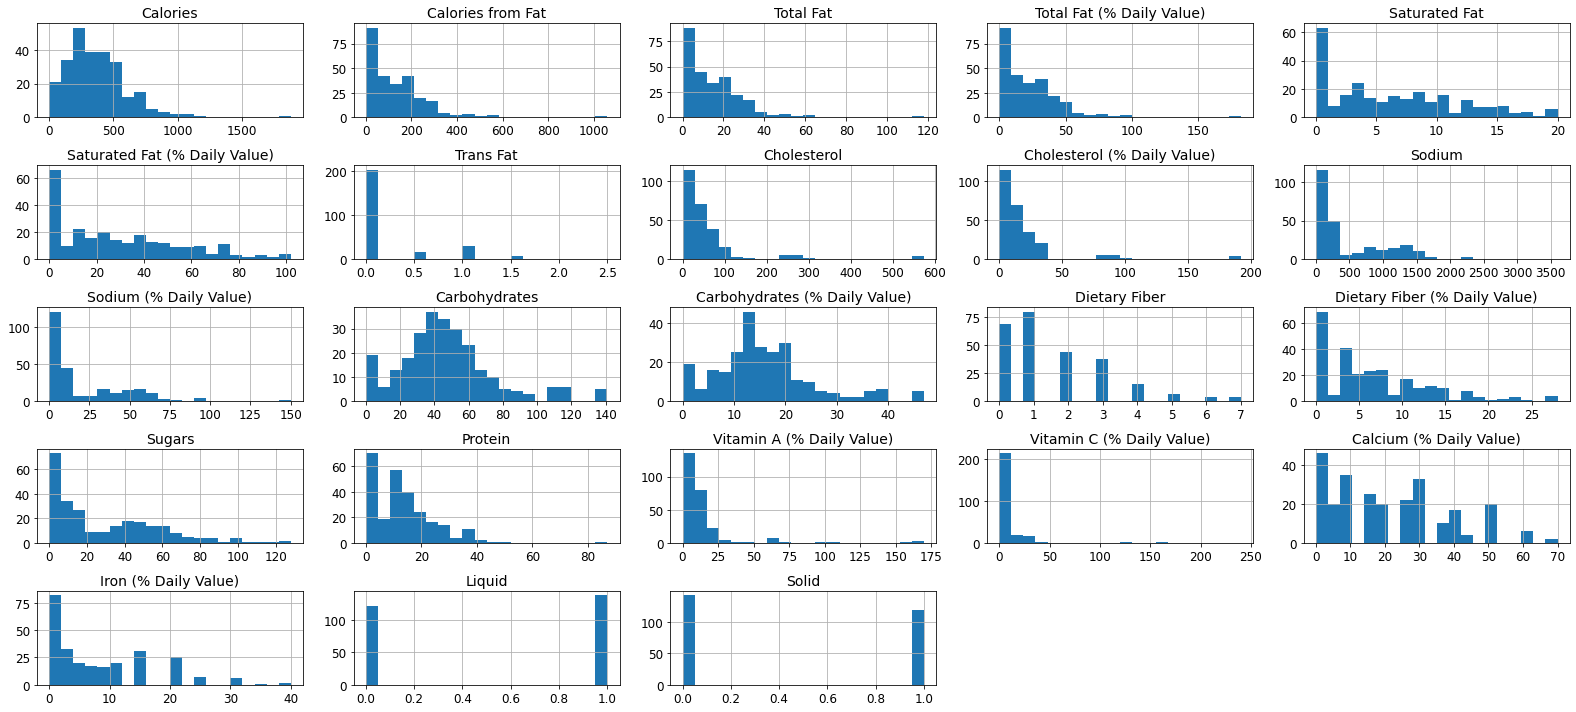

In [82]:
## DISTRIBUCIÓN DE DATOS SIN SEPARAR LIQUIDOS Y SOLIDOS

display_dataset_distributions(df)

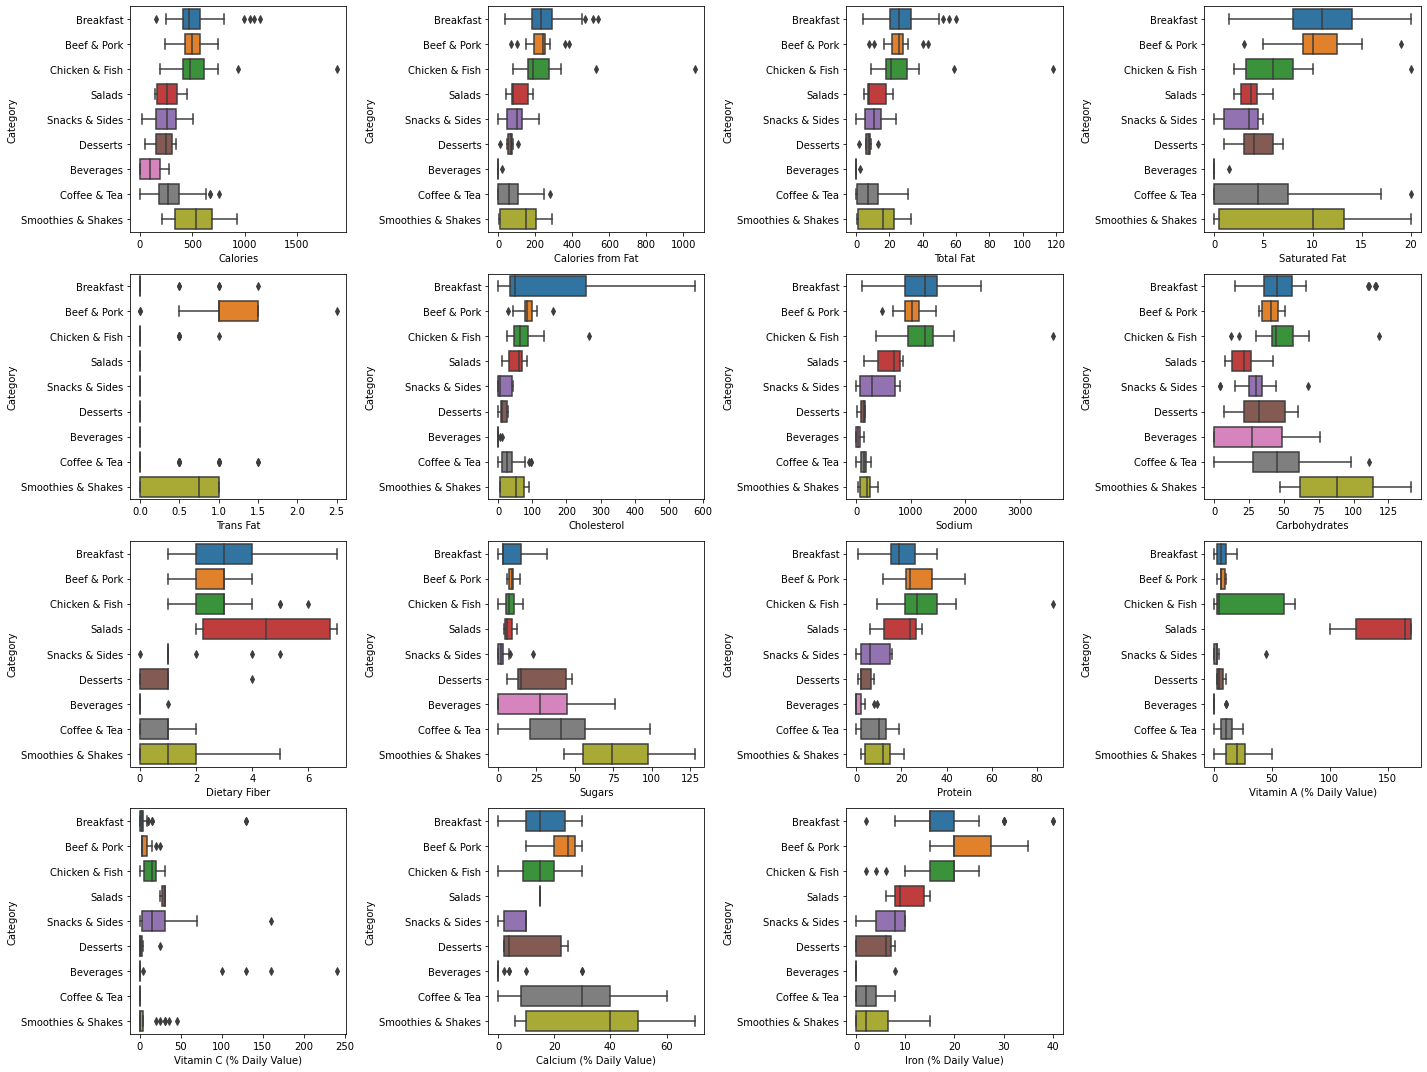

In [83]:
names = [
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Saturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Carbohydrates',
 'Dietary Fiber',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in names:
    plt.subplot(a, b, c)
    sns.boxplot(y=df['Category'], x=df[i])
    c = c + 1

plt.tight_layout()
plt.show()

# DISTRIBUCIÓN SOLIDOS

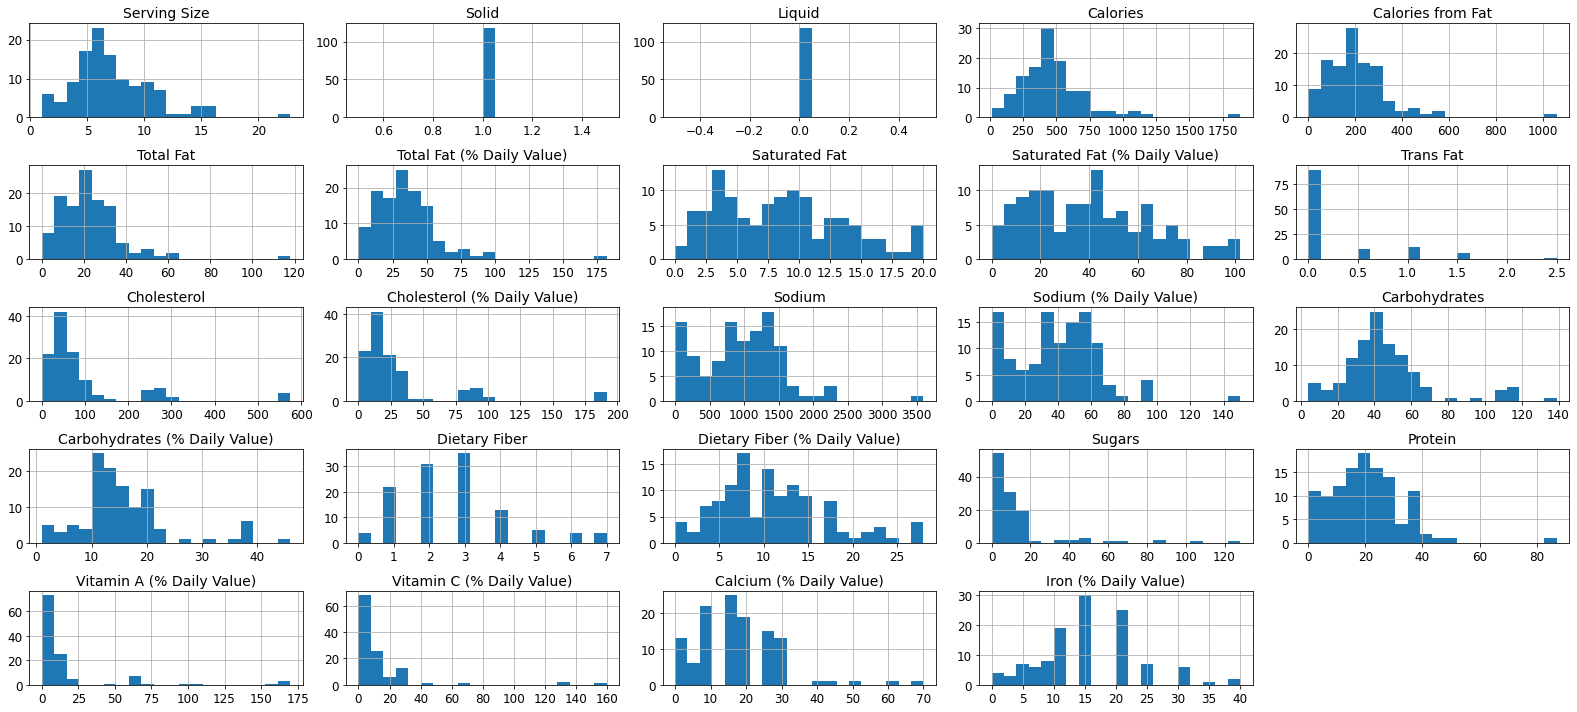

In [84]:
## DISTRIBUCIÓN SOLIDOS
display_dataset_distributions(df_solid)

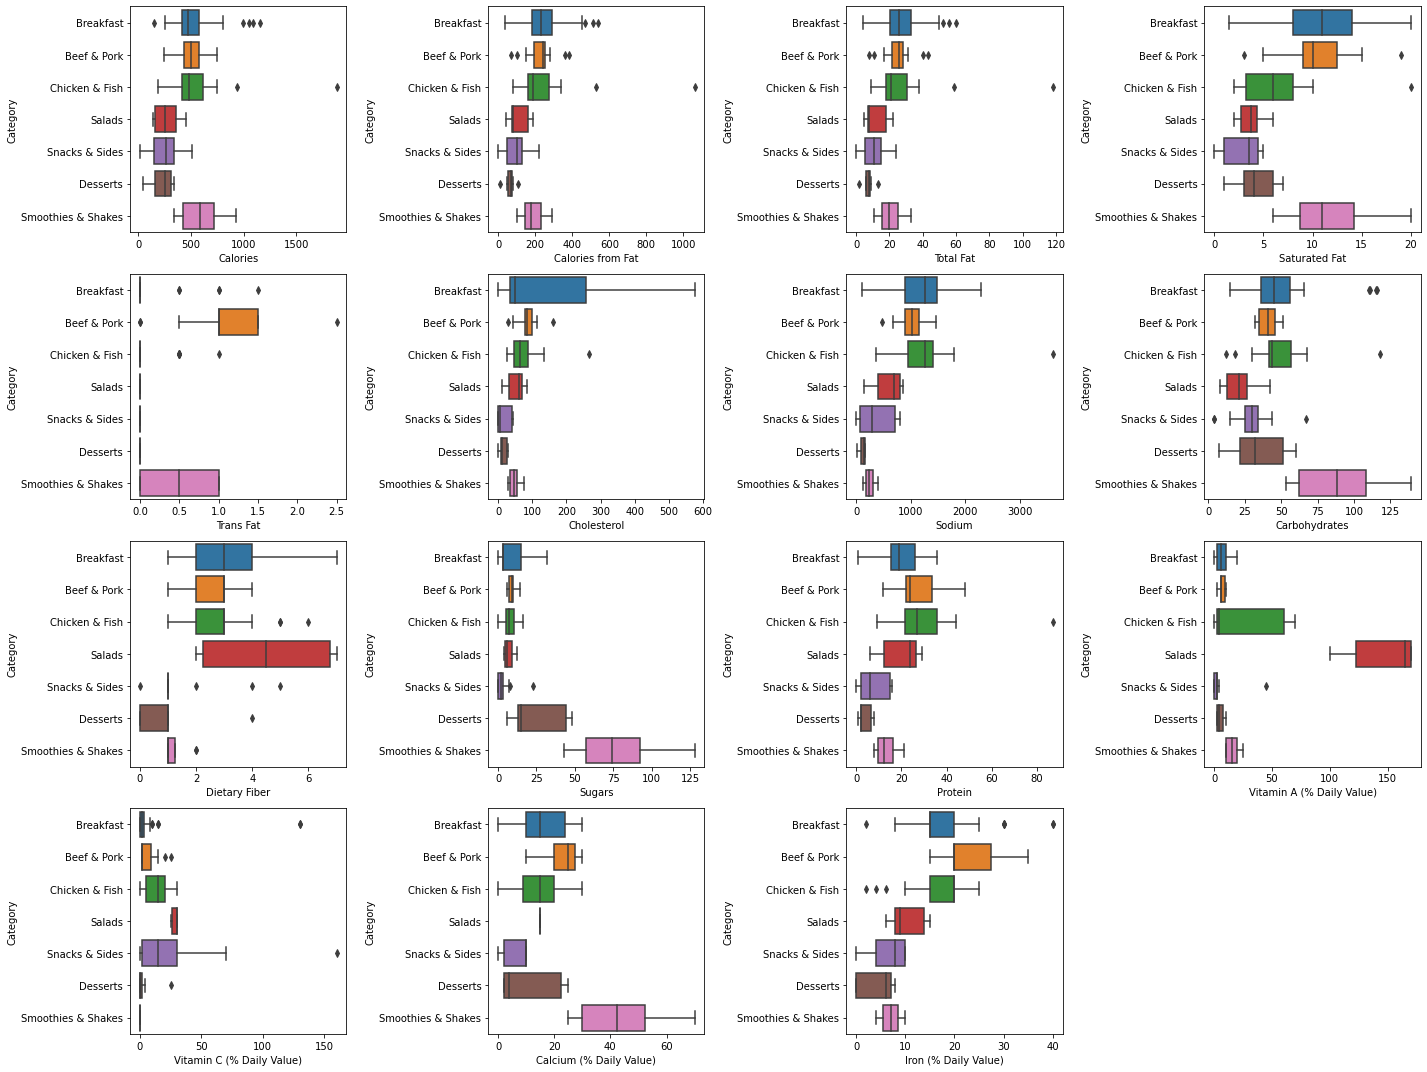

In [85]:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in names:
    plt.subplot(a, b, c)
    sns.boxplot(y=df_solid['Category'], x=df_solid[i])
    c = c + 1

plt.tight_layout()
plt.show()

# DISTRIBUCIÓN LÍQUIDOS

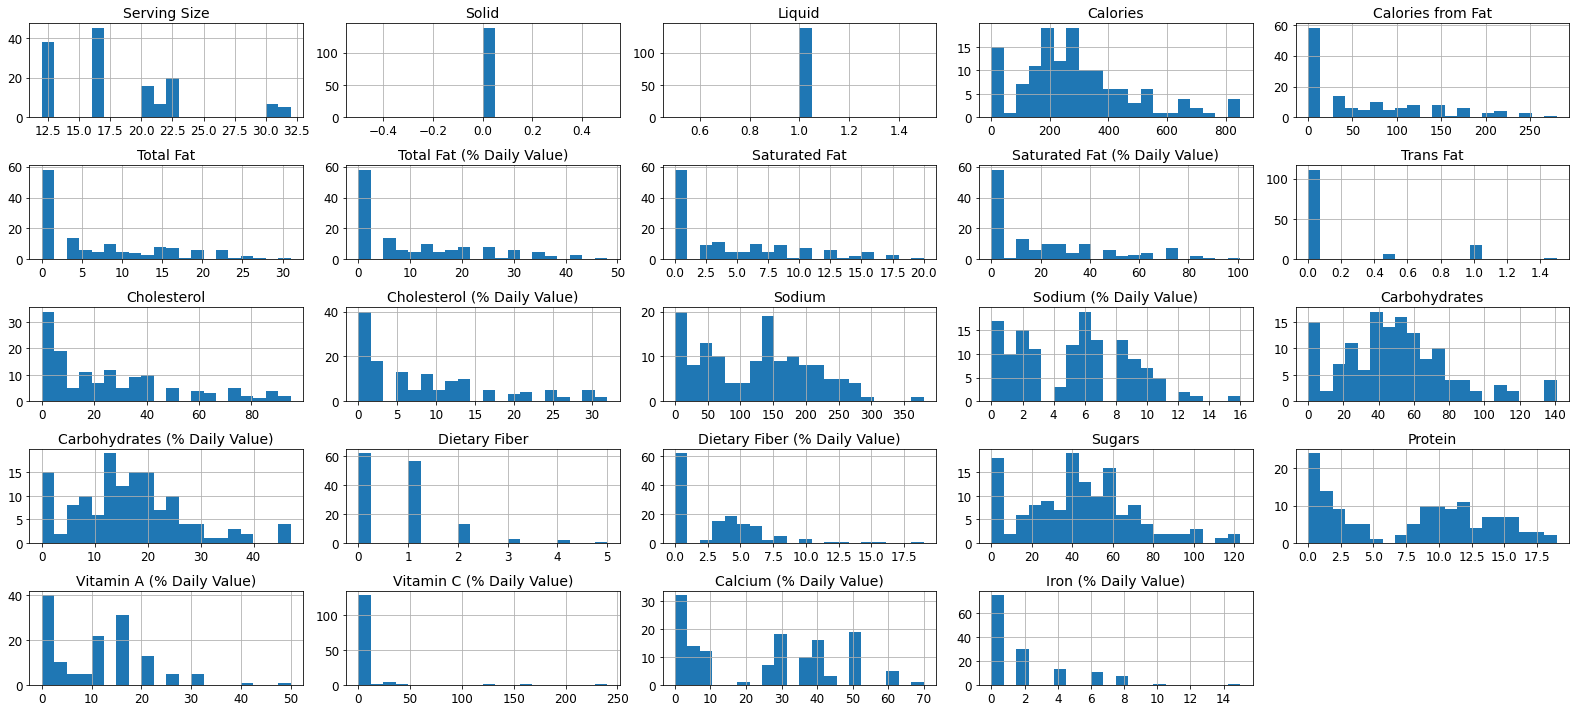

In [86]:
## DISTRIBUCIÓN LIQUIDOS
display_dataset_distributions(df_liquid)

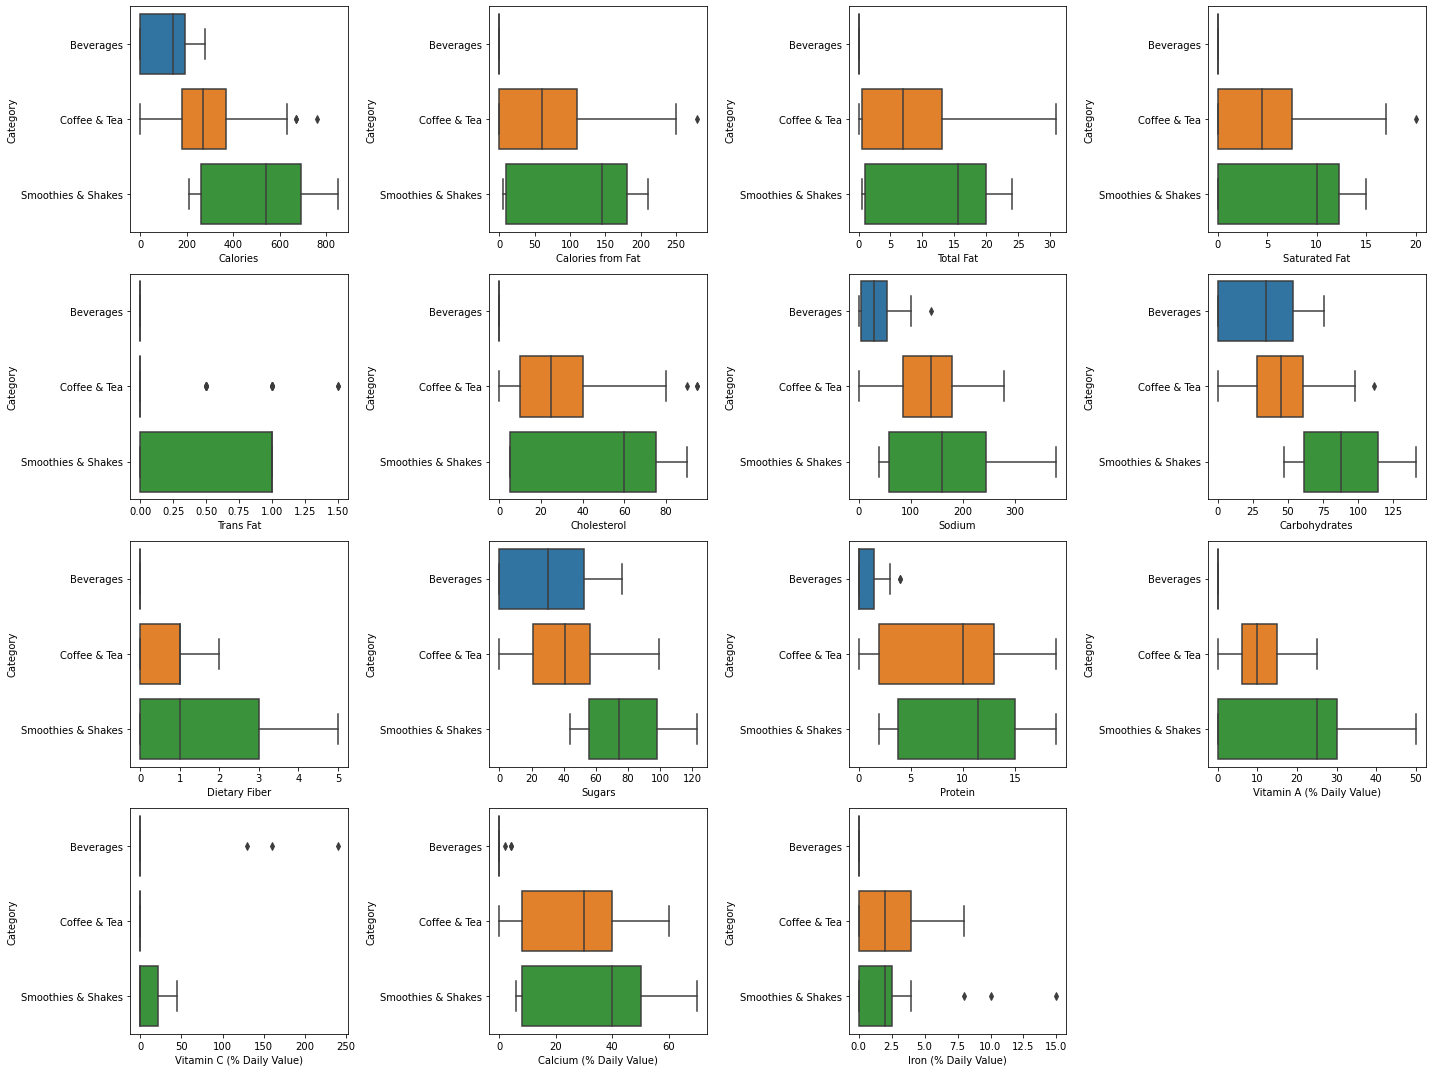

In [87]:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in names:
    plt.subplot(a, b, c)
    sns.boxplot(y=df_liquid['Category'], x=df_liquid[i])
    c = c + 1

plt.tight_layout()
plt.show()

# CORRELACIÓN DE SOLIDOS Y LÍQUIDOS SEPARADOS

### Se realiza división de cada feature numérico por la columna **Serving Size** con el fin de verificar el aporte de componentes por oz, mejorar la multcolinealidad y verificar features de entrada 


- Fue posible visualizar los features de entrada de acuerdo a la mejora del skew en sus distribuciones

In [88]:
df_unit_solid = pd.DataFrame()
df_unit_liquid = pd.DataFrame()

for name in names:
    df_unit_solid[name] =  df_solid[name]/df_solid['Serving Size']
    df_unit_liquid[name] =  df_liquid[name]/df_liquid['Serving Size']


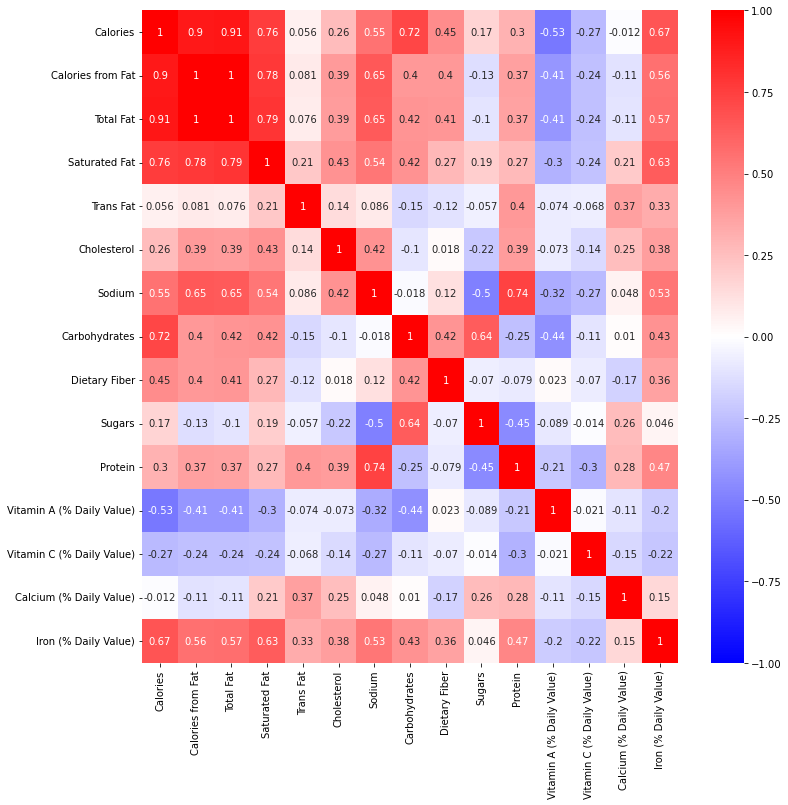

In [89]:
## CORRELACIÓN DE FEATURES EN SOLIDOS 

plt.figure(figsize=(12,12))
cor = df_unit_solid.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.bwr, vmin=-1, vmax=1)
plt.show()

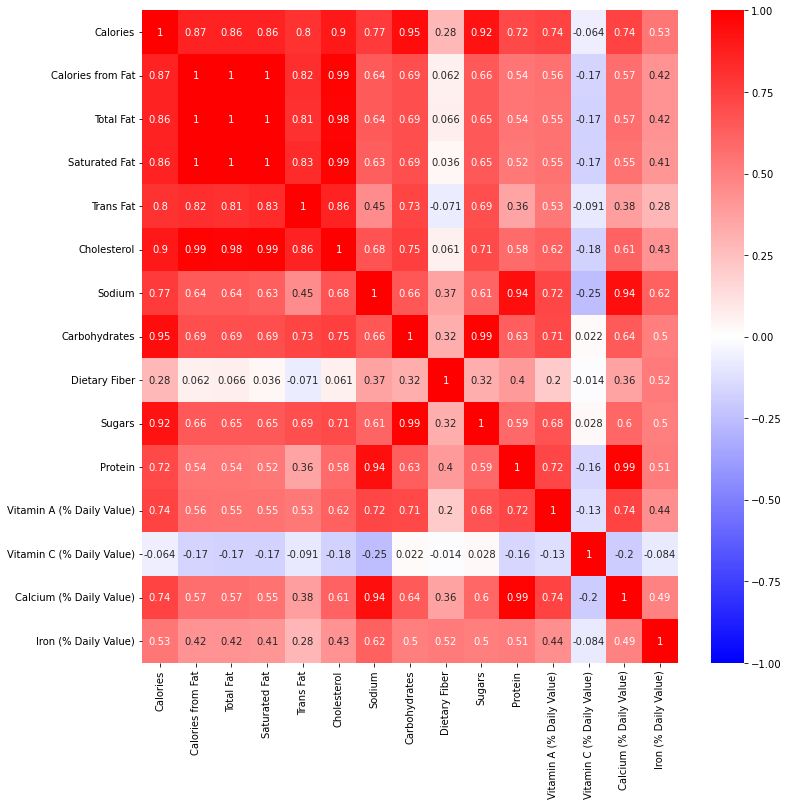

In [90]:
## CORRELACIÓN DE FEATURES EN LÍQUIDOS

plt.figure(figsize=(12,12))
cor = df_unit_liquid.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.bwr, vmin=-1, vmax=1)
plt.show()

# Modelo de regresión para determinar calorías

In [91]:

y = df2['Calories']
x = df2[['Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Protein']]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 15, test_size = 0.2)

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
# Imprimimos los coeficientes
print(linear_regression.intercept_)
print(linear_regression.coef_)

y_pred = linear_regression.predict(x_test)
print("Score en train: ",linear_regression.score(x_train, y_train))
print("Score en test: ",linear_regression.score(x_test, y_test))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))
y_pred.shape, x_test.shape


-2.372327580572687
[8.99446727 3.98761957 0.23680181 4.04139377]
Score en train:  0.9995341928498557
Score en test:  0.9990363143472537
RMSE:  5.962009541697269


((52,), (52, 4))

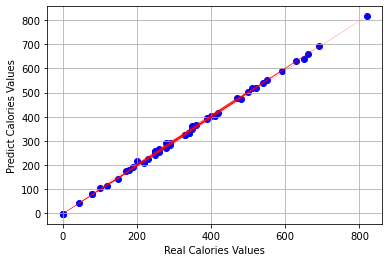

In [92]:
plt.plot(y_test, y_pred, color="red", linewidth=0.1)
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Real Calories Values")
plt.ylabel("Predict Calories Values")
plt.grid()
plt.show()

# MODELO DE CLASIFICACIÓN 
## Árbol de decisión
### - Se realiza entrenamiento de modelos sin balancear clases ni stratify

In [93]:
x2 = df2[[
 'Serving Size',
 'Liquid',
 'Solid',
 'Total Fat (% Daily Value)',
 'Saturated Fat (% Daily Value)',
 'Cholesterol (% Daily Value)',
 'Sodium (% Daily Value)',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']]

y2 = df2['Category']
x2.shape, y2.shape

((260, 15), (260,))

In [139]:
x2

,Serving Size,Liquid,Solid,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8,0,1,20,25,87,31,10,17,3,17,10,0,25,15
1,4.8,0,1,12,15,8,32,10,17,3,18,6,0,25,8
2,3.9,0,1,35,42,15,33,10,17,2,14,8,0,25,10
3,5.7,0,1,43,52,95,36,10,17,2,21,15,0,30,15
4,5.7,0,1,35,42,16,37,10,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,10.1,0,1,26,44,14,12,27,4,64,12,15,0,40,8
256,13.4,0,1,35,58,19,16,35,5,85,15,20,0,50,10
257,6.7,0,1,17,29,9,8,18,2,43,8,10,0,25,6
258,14.2,0,1,50,76,20,17,38,9,103,21,20,0,60,6


In [140]:
y2

0               Breakfast
1               Breakfast
2               Breakfast
3               Breakfast
4               Breakfast
              ...        
255    Smoothies & Shakes
256    Smoothies & Shakes
257    Smoothies & Shakes
258    Smoothies & Shakes
259    Smoothies & Shakes
Name: Category, Length: 260, dtype: object

In [94]:
cx_train, cx_test, cy_train, cy_test = train_test_split(x2, y2, random_state = 15, test_size = 0.2)
print("Categorías en train:'\n",cy_train.value_counts())
print("\nCategorías en test:\n",cy_test.value_counts())


Categorías en train:'
 Coffee & Tea          74
Breakfast             36
Beverages             22
Chicken & Fish        22
Smoothies & Shakes    21
Beef & Pork           14
Snacks & Sides         8
Salads                 6
Desserts               5
Name: Category, dtype: int64

Categorías en test:
 Coffee & Tea          21
Smoothies & Shakes     7
Breakfast              6
Snacks & Sides         5
Chicken & Fish         5
Beverages              5
Desserts               2
Beef & Pork            1
Name: Category, dtype: int64


|--- Solid <= 0.50
|   |--- Cholesterol (% Daily Value) <= 0.50
|   |   |--- Sodium (% Daily Value) <= 1.50
|   |   |   |--- Vitamin C (% Daily Value) <= 65.00
|   |   |   |   |--- Protein <= 0.50
|   |   |   |   |   |--- class: Beverages
|   |   |   |   |--- Protein >  0.50
|   |   |   |   |   |--- class: Coffee & Tea
|   |   |   |--- Vitamin C (% Daily Value) >  65.00
|   |   |   |   |--- class: Beverages
|   |   |--- Sodium (% Daily Value) >  1.50
|   |   |   |--- class: Beverages
|   |--- Cholesterol (% Daily Value) >  0.50
|   |   |--- Carbohydrates (% Daily Value) <= 24.00
|   |   |   |--- Vitamin C (% Daily Value) <= 2.00
|   |   |   |   |--- Liquid <= 0.50
|   |   |   |   |   |--- class: Beverages
|   |   |   |   |--- Liquid >  0.50
|   |   |   |   |   |--- class: Coffee & Tea
|   |   |   |--- Vitamin C (% Daily Value) >  2.00
|   |   |   |   |--- Sugars <= 28.00
|   |   |   |   |   |--- class: Beverages
|   |   |   |   |--- Sugars >  28.00
|   |   |   |   |   |--- class: Smoot

c:\Users\raul.blanco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predichos')

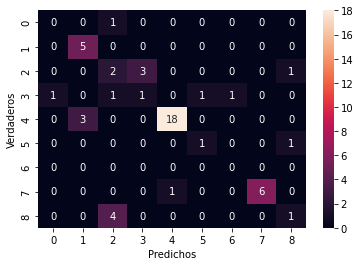

In [95]:
model1 = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')
model1.fit(cx_train, cy_train)

##REPRESENTACIÓN TEXTUAL DEL ÁRBOL

text_representation = tree.export_text(model1, feature_names=[#'Category',
 #'Item',
 'Serving Size',
 'Liquid',
 'Solid',
 #'Calories',
 #'Calories from Fat',
 #'Total Fat',
 'Total Fat (% Daily Value)',
 #'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 #'Trans Fat',
 #'Cholesterol',
 'Cholesterol (% Daily Value)',
 #'Sodium',
 'Sodium (% Daily Value)',
 #'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 #'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)'])
print(text_representation)

## PREDICCIÓN DE TEST 
cy_pred = model1.predict(cx_test)

print("Accuracy", accuracy_score(cy_test,cy_pred))
print("Recall", recall_score(cy_test,cy_pred, average = 'weighted'))
print("Precision", precision_score(cy_test,cy_pred,average = 'weighted'),"\n")



confusion_matrix(cy_test, cy_pred)
sns.heatmap(confusion_matrix(cy_test, cy_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

## realizando stratyfy y Enconding a los target se denota una mejora en el modelo

|--- Solid <= 0.50
|   |--- Cholesterol (% Daily Value) <= 0.50
|   |   |--- Sodium (% Daily Value) <= 1.50
|   |   |   |--- Vitamin C (% Daily Value) <= 65.00
|   |   |   |   |--- Protein <= 0.50
|   |   |   |   |   |--- class: Beverages
|   |   |   |   |--- Protein >  0.50
|   |   |   |   |   |--- class: Coffee & Tea
|   |   |   |--- Vitamin C (% Daily Value) >  65.00
|   |   |   |   |--- class: Beverages
|   |   |--- Sodium (% Daily Value) >  1.50
|   |   |   |--- class: Beverages
|   |--- Cholesterol (% Daily Value) >  0.50
|   |   |--- Carbohydrates (% Daily Value) <= 24.00
|   |   |   |--- Vitamin C (% Daily Value) <= 2.00
|   |   |   |   |--- Liquid <= 0.50
|   |   |   |   |   |--- class: Beverages
|   |   |   |   |--- Liquid >  0.50
|   |   |   |   |   |--- class: Coffee & Tea
|   |   |   |--- Vitamin C (% Daily Value) >  2.00
|   |   |   |   |--- Sugars <= 28.00
|   |   |   |   |   |--- class: Beverages
|   |   |   |   |--- Sugars >  28.00
|   |   |   |   |   |--- class: Smoot

c:\Users\raul.blanco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predichos')

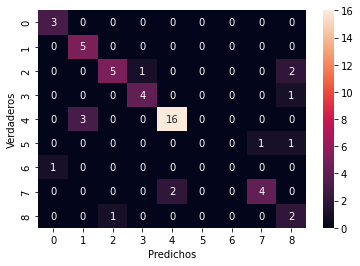

In [96]:
## DIVISIÓN DE DATASET CON STRATIFY
cx_train, cx_test, cy_train, cy_test = train_test_split(x2, y2, stratify=y2.to_list(), random_state = 15, test_size = 0.2)

## LABEL ENCONDING A TARGET DE TRAIN Y TEST
encoder = LabelEncoder()
cy_test = encoder.fit_transform(cy_test)
cy_train = encoder.fit_transform(cy_train)

model1.fit(cx_train, cy_train)

print(text_representation)

cy_pred = model1.predict(cx_test)

print("Accuracy", accuracy_score(cy_test,cy_pred))
print("Recall", recall_score(cy_test,cy_pred, average = 'weighted'))
print("Precision", precision_score(cy_test,cy_pred,average = 'weighted'),"\n")

confusion_matrix(cy_test, cy_pred)
sns.heatmap(confusion_matrix(cy_test, cy_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

## MODELO DE RANDOM FOREST UTILIZANDO STRATIFY Y LABEL ENCONDING

### - El módelo de random forest demuestra un alto rendimiento en la predicción de la categpría

Accuracy 0.9615384615384616
Recall 0.9615384615384616
Precision 0.9652472527472528 

f1:  0.9582511505588427 



Text(0.5, 15.0, 'Predichos')

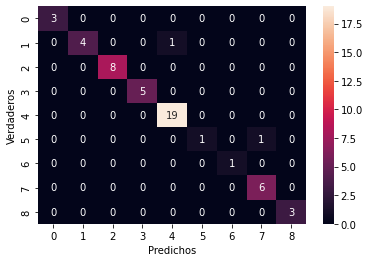

In [97]:
## LOS PARÁMETROS UTILIZADOS DE RANDOM FOREST SE EXPLICAN MÁS ADELANTE

model = RandomForestClassifier(n_estimators = 29, max_depth=11, random_state=15) 
model.fit(cx_train, cy_train)
cy_pred_rf1 = model.predict(cx_test)

cy_pred_rf = model.predict(cx_test)


print("Accuracy", accuracy_score(cy_test,cy_pred_rf1))
print("Recall", recall_score(cy_test,cy_pred_rf1, average = 'weighted'))
print("Precision", precision_score(cy_test,cy_pred_rf1,average = 'weighted'),"\n")
print("f1: ", f1_score(cy_test,cy_pred_rf1,average = 'weighted'),"\n")

confusion_matrix(cy_test, cy_pred_rf1)
sns.heatmap(confusion_matrix(cy_test, cy_pred_rf1), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')


# TUNING MANUAL DEL MODELO RANDOM FOREST

In [98]:
f1=0
estimador=0
profundidad=0

for x in range(1,60):  # SE COLOCA UN TOPE DE 60 ESTIMADORES 
    for y in range(1,40): # TOPE DE 40 DE PROFUNDIDAD DEL ÁRBOL
        model_tune = RandomForestClassifier(n_estimators = x, max_depth=y, random_state=15)
        model_tune.fit(cx_train, cy_train)
        cy_pred_rf = model_tune.predict(cx_test)
        
        if f1_score(cy_test,cy_pred_rf,average = 'weighted') > f1:
            f1=f1_score(cy_test,cy_pred_rf,average = 'weighted')
            estimador=x
            profundidad=y

        
print("Mejor estimador: ",estimador, "\nTree depth:",profundidad, "\nf1_score: ",f1)

Mejor estimador:  29 
Tree depth: 11 
f1_score:  0.9582511505588427


# APLICANDO OVER SAMPLING

## - demuestra aumento en la eficiencia del modelo

In [99]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(cx_train, cy_train)

In [100]:
## CONTAR REPETICIONES POR CLASE
np.unique(encoder.inverse_transform(y_resampled), return_counts=True)

(array(['Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish',
        'Coffee & Tea', 'Desserts', 'Salads', 'Smoothies & Shakes',
        'Snacks & Sides'], dtype=object),
 array([76, 76, 76, 76, 76, 76, 76, 76, 76], dtype=int64))

In [101]:
model2 = RandomForestClassifier(n_estimators = 29, max_depth=11, random_state=15)
model2.fit(X_resampled, y_resampled)
cy_pred_rf2 = model2.predict(cx_test)

print("Accuracy", accuracy_score(cy_test,cy_pred_rf2))
print("Recall", recall_score(cy_test,cy_pred_rf2, average = 'weighted'))
print("Precision", precision_score(cy_test,cy_pred_rf2,average = 'weighted'),"\n")
print("f1: ", f1_score(cy_test,cy_pred_rf2,average = 'weighted'),"\n")

Accuracy 0.9807692307692307
Recall 0.9807692307692307
Precision 0.9817307692307692 

f1:  0.979947403024326 



Text(0.5, 15.0, 'Predichos')

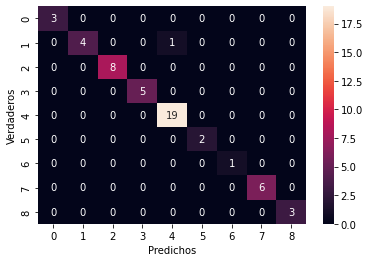

In [102]:
confusion_matrix(cy_test, cy_pred_rf2)
sns.heatmap(confusion_matrix(cy_test, cy_pred_rf2), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

## Guardo el modelo utilizando MlFlow

### Registro experimentos

In [104]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run():
    model2 = RandomForestClassifier(n_estimators = 29, max_depth=11, random_state=15)
    model2.fit(X_resampled, y_resampled)
    
    mlflow.sklearn.log_model(model,'model')
    mlflow.set_tag('developer','Raul Blanco')
    
    
    train_accuracy = accuracy_score(cy_test,cy_pred_rf2)
    Recall = recall_score(cy_test,cy_pred_rf2, average = 'weighted')
    Precision = precision_score(cy_test,cy_pred_rf2,average = 'weighted')
    f1 = f1_score(cy_test,cy_pred_rf2,average = 'weighted')


    mlflow.log_metric('train_accuracy', train_accuracy)
    mlflow.log_metric('Recall', Recall)
    mlflow.log_metric('Precision', Precision)
    mlflow.log_metric('f1', f1)

2023/04/18 18:53:33 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/0/9f19cacabe00425990a18892ff805b18/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.


### Registro experimentos utilizando Autolog

In [105]:
mlflow.sklearn.autolog()

cx_train, cx_test, cy_train, cy_test = train_test_split(x2, y2, random_state = 15, test_size = 0.2)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

Decision Tree Classifier

In [106]:
with mlflow.start_run():
    model = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')
    model.fit(cx_train, cy_train)
    
    mlflow.sklearn.log_model(model,'Decision Tree Classifier')
    mlflow.set_tag('developer','Raul Blanco')
    cy_pred = model.predict(cx_test)

    test_acc = accuracy_score(cy_test,cy_pred)
    Recall = recall_score(cy_test,cy_pred, average = 'weighted')
    Precision = precision_score(cy_test,cy_pred,average = 'weighted')

    mlflow.log_metric('Test accuracy', float(test_acc))
    mlflow.log_metric('Recall', float(Recall))
    mlflow.log_metric('Precision', float(Precision))

2023/04/18 18:55:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\raul.blanco\Anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/04/18 18:56:41 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The m

Label Encoder

In [50]:
with mlflow.start_run():
    cx_train, cx_test, cy_train, cy_test = train_test_split(x2, y2, stratify=y2.to_list(), random_state = 15, test_size = 0.2)
    
    encoder = LabelEncoder()
    cy_test = encoder.fit_transform(cy_test)
    cy_train = encoder.fit_transform(cy_train)

    model1.fit(cx_train, cy_train)

    cy_pred = model1.predict(cx_test)

    mlflow.sklearn.log_model(model,'With label encoding')
    mlflow.set_tag('developer','Raul Blanco')
        
    test_acc = accuracy_score(cy_test,cy_pred)
    Recall = recall_score(cy_test,cy_pred, average = 'weighted')
    Precision = precision_score(cy_test,cy_pred,average = 'weighted')

    mlflow.log_metric('Test accuracy', test_acc)
    mlflow.log_metric('Recall', Recall)
    mlflow.log_metric('Precision', Precision)

2023/04/15 15:50:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\raul.blanco\Anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/04/15 15:51:07 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The m

Random Forest

In [107]:
with mlflow.start_run():
    model = RandomForestClassifier(n_estimators = 29, max_depth=11, random_state=15) 
    model.fit(cx_train, cy_train)
    cy_pred_rf1 = model.predict(cx_test)
    cy_pred_rf = model.predict(cx_test)

    mlflow.sklearn.log_model(model,'Random Forest Classifier')
    mlflow.set_tag('developer','Raul Blanco')
        
    test_acc = accuracy_score(cy_test,cy_pred)
    Recall = recall_score(cy_test,cy_pred, average = 'weighted')
    Precision = precision_score(cy_test,cy_pred,average = 'weighted')
    f1 = f1_score(cy_test,cy_pred_rf1,average = 'weighted')

    mlflow.log_metric('Test accuracy', float(test_acc))
    mlflow.log_metric('Recall', float(Recall))
    mlflow.log_metric('Precision', float(Precision))
    mlflow.log_metric('f1', float(f1))

2023/04/18 19:00:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\raul.blanco\Anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/04/18 19:01:45 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The m

In [108]:
#Buscar los runs (experimentos) en el servidor 
runs =  mlflow.search_runs()
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_accuracy_score,metrics.training_roc_auc_score,metrics.training_precision_score,metrics.Precision,...,params.max_features,params.class_weight,params.splitter,tags.estimator_name,tags.mlflow.runName,tags.mlflow.source.type,tags.developer,tags.mlflow.user,tags.mlflow.source.name,tags.estimator_class
0,36d1edeb7976418fbceadfb56518cbaa,0,FINISHED,mlflow-artifacts:/0/36d1edeb7976418fbceadfb565...,2023-04-18 22:00:38.882000+00:00,2023-04-18 22:02:51.671000+00:00,0.995192,0.999982,0.995401,0.678264,...,sqrt,None,None,RandomForestClassifier,gregarious-elk-729,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.ensemble._forest.RandomForestClassifier
1,5e694f01a723434cbe7905cf1d04ed5e,0,FINISHED,mlflow-artifacts:/0/5e694f01a723434cbe7905cf1d...,2023-04-18 21:55:34.911000+00:00,2023-04-18 21:57:48.186000+00:00,0.884615,0.992310,0.901560,0.678264,...,None,None,best,DecisionTreeClassifier,funny-calf-618,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.tree._classes.DecisionTreeClassifier
2,9f19cacabe00425990a18892ff805b18,0,FINISHED,mlflow-artifacts:/0/9f19cacabe00425990a18892ff...,2023-04-18 21:52:27.478000+00:00,2023-04-18 21:53:33.391000+00:00,NaN,NaN,NaN,0.981731,...,None,None,None,None,unique-moth-324,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,None


Best experiment run

In [109]:
best_model_run_id = runs.sort_values(by = ['metrics.Test accuracy'], ascending = False).iloc[0]['run_id']
best_model_run_id

'36d1edeb7976418fbceadfb56518cbaa'

In [110]:
#Cargar el modelo como la libreria nativa en la que fue guardada
best_model = mlflow.sklearn.load_model(f'/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje de Maquina II/TP/mlartifacts/0/{best_model_run_id}/artifacts/model')
    #f'/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje de Maquina II/TP/mlruns/0/{best_model_run_id}/artifacts/model')

In [111]:
best_model

RandomForestClassifier(max_depth=11, n_estimators=29, random_state=15)

In [112]:
#cargar el modelo como un wrapper de mlflow
best_model_pyfunc = mlflow.pyfunc.load_model(
    f'/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje de Maquina II/TP/mlartifacts/0/{best_model_run_id}/artifacts/model')

In [113]:
best_model_pyfunc

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 36d1edeb7976418fbceadfb56518cbaa

In [114]:
#Ver la implementación del modelo
best_model_pyfunc._model_impl

RandomForestClassifier(max_depth=11, n_estimators=29, random_state=15)

## Registrar Modelos

In [115]:
 # la base de datos donde se almacenan los modelos estará en la carpeta donde alojé a MlFlow en el archivo mlruns.db
mlflow.set_registry_uri('sqlite:///mlruns.db')

client = mlflow.client.MlflowClient()

In [116]:
#Creo la primera versión
mlflow.register_model(f'/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje de Maquina II/TP/mlartifacts/0/{best_model_run_id}/artifacts/model',
                     'model_churn')

Successfully registered model 'model_churn'.
2023/04/18 19:11:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: model_churn, version 1
Created version '1' of model 'model_churn'.


<ModelVersion: creation_timestamp=1681855861026, current_stage='None', description=None, last_updated_timestamp=1681855861026, name='model_churn', run_id=None, run_link=None, source=('/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje '
 'de Maquina '
 'II/TP/mlartifacts/0/36d1edeb7976418fbceadfb56518cbaa/artifacts/model'), status='READY', status_message=None, tags={}, user_id=None, version=1>

In [117]:
#Creo una nueva version
mlflow.register_model(f'/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje de Maquina II/TP/mlartifacts/0/{best_model_run_id}/artifacts/model',
                     'model_churn')

Registered model 'model_churn' already exists. Creating a new version of this model...
2023/04/18 19:11:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: model_churn, version 2
Created version '2' of model 'model_churn'.


<ModelVersion: creation_timestamp=1681855886411, current_stage='None', description=None, last_updated_timestamp=1681855886411, name='model_churn', run_id=None, run_link=None, source=('/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Aprendizaje '
 'de Maquina '
 'II/TP/mlartifacts/0/36d1edeb7976418fbceadfb56518cbaa/artifacts/model'), status='READY', status_message=None, tags={}, user_id=None, version=2>

In [118]:
#Puedo levantar mi modelo por versiones o por estadío
mlflow.sklearn.load_model('models:/model_churn/2')

RandomForestClassifier(max_depth=11, n_estimators=29, random_state=15)

In [119]:
#Puedo levantar mi modelo por versiones o por estadío
mlflow.sklearn.load_model('models:/model_churn/1')

RandomForestClassifier(max_depth=11, n_estimators=29, random_state=15)

como wraper de MlFlow

In [120]:
mlflow.pyfunc.load_model('models:/model_churn/2')

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 36d1edeb7976418fbceadfb56518cbaa

## Train and Log models

In [122]:
with mlflow.start_run():
    model = tree.DecisionTreeClassifier(max_depth = 1)
    model.fit(cx_train,cy_train)
    
    mlflow.sklearn.log_model(model,'model')
    mlflow.set_tag('developer','Raul Blanco')

c:\Users\raul.blanco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023/04/18 19:21:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\raul.blanco\Anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missin

In [123]:
with mlflow.start_run():
    model = tree.DecisionTreeClassifier(max_depth = 2)
    model.fit(cx_train,cy_train)
    
    mlflow.sklearn.log_model(model,'model')
    mlflow.set_tag('developer','Raul Blanco')

c:\Users\raul.blanco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023/04/18 19:25:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\raul.blanco\Anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missin

In [124]:
with mlflow.start_run():
    model = tree.DecisionTreeClassifier(max_depth = 5)
    model.fit(cx_train,cy_train)
    
    mlflow.sklearn.log_model(model,'model')
    mlflow.set_tag('developer','Raul Blanco')

2023/04/18 19:29:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\raul.blanco\Anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/04/18 19:30:50 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The m

In [125]:
runs = mlflow.search_runs()
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_score,metrics.training_accuracy_score,metrics.training_roc_auc_score,metrics.training_f1_score,...,params.verbose,params.warm_start,params.oob_score,tags.estimator_name,tags.mlflow.runName,tags.mlflow.source.type,tags.developer,tags.mlflow.user,tags.mlflow.source.name,tags.estimator_class
0,0042aa41607140be84663ecacf4d9986,0,FINISHED,mlflow-artifacts:/0/0042aa41607140be84663ecacf...,2023-04-18 22:29:44.398000+00:00,2023-04-18 22:31:57.212000+00:00,0.875000,0.875000,0.988430,0.882836,...,None,None,None,DecisionTreeClassifier,casual-midge-432,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.tree._classes.DecisionTreeClassifier
1,da3b61b4b77c4275ac72fc5b557e5436,0,FINISHED,mlflow-artifacts:/0/da3b61b4b77c4275ac72fc5b55...,2023-04-18 22:25:00.385000+00:00,2023-04-18 22:27:12.465000+00:00,0.639423,0.639423,0.881275,0.555981,...,None,None,None,DecisionTreeClassifier,shivering-gull-92,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.tree._classes.DecisionTreeClassifier
2,b3997317835b4560bb8b8d29a0432e58,0,FINISHED,mlflow-artifacts:/0/b3997317835b4560bb8b8d29a0...,2023-04-18 22:21:34.407000+00:00,2023-04-18 22:23:47.202000+00:00,0.528846,0.528846,0.774339,0.378311,...,None,None,None,DecisionTreeClassifier,blushing-hound-990,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.tree._classes.DecisionTreeClassifier
3,36d1edeb7976418fbceadfb56518cbaa,0,FINISHED,mlflow-artifacts:/0/36d1edeb7976418fbceadfb565...,2023-04-18 22:00:38.882000+00:00,2023-04-18 22:02:51.671000+00:00,0.995192,0.995192,0.999982,0.995229,...,0,False,False,RandomForestClassifier,gregarious-elk-729,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.ensemble._forest.RandomForestClassifier
4,5e694f01a723434cbe7905cf1d04ed5e,0,FINISHED,mlflow-artifacts:/0/5e694f01a723434cbe7905cf1d...,2023-04-18 21:55:34.911000+00:00,2023-04-18 21:57:48.186000+00:00,0.884615,0.884615,0.992310,0.884871,...,None,None,None,DecisionTreeClassifier,funny-calf-618,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,sklearn.tree._classes.DecisionTreeClassifier
5,9f19cacabe00425990a18892ff805b18,0,FINISHED,mlflow-artifacts:/0/9f19cacabe00425990a18892ff...,2023-04-18 21:52:27.478000+00:00,2023-04-18 21:53:33.391000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,unique-moth-324,LOCAL,Raul Blanco,raul.blanco,c:\Users\raul.blanco\Anaconda3\lib\site-packag...,None


In [126]:
first_model_run_id  = runs["run_id"][3]
second_model_run_id = runs["run_id"][4]
third_model_run_id = runs["run_id"][5]

Registro el primer modelo y lo pongo en production

In [129]:
first_registered_model = mlflow.register_model(f'runs:/{first_model_run_id}/model', "Menu")

#Como esta es mi primer corrida, voy a hacer que este primer modelo entre a prod derecho
client.transition_model_version_stage(
    name="Menu", version=first_registered_model.version, stage="Production"
)

Successfully registered model 'Menu'.
2023/04/18 19:39:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Menu, version 1
Created version '1' of model 'Menu'.


<ModelVersion: creation_timestamp=1681857587554, current_stage='Production', description=None, last_updated_timestamp=1681857587566, name='Menu', run_id='36d1edeb7976418fbceadfb56518cbaa', run_link=None, source='mlflow-artifacts:/0/36d1edeb7976418fbceadfb56518cbaa/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

Registro el segundo modelo y lo pongo en staging

In [130]:
second_registered_model = mlflow.register_model(f'runs:/{second_model_run_id}/model', "Menu")

#Mi segundo modelo registrado, lo quiero pasar a Staging
client.transition_model_version_stage(
    name="Menu", version=second_registered_model.version, stage="Staging"
)

Registered model 'Menu' already exists. Creating a new version of this model...
2023/04/18 19:39:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Menu, version 2
Created version '2' of model 'Menu'.


<ModelVersion: creation_timestamp=1681857589822, current_stage='Staging', description=None, last_updated_timestamp=1681857589839, name='Menu', run_id='5e694f01a723434cbe7905cf1d04ed5e', run_link=None, source='mlflow-artifacts:/0/5e694f01a723434cbe7905cf1d04ed5e/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=2>

Registro el tercer modelo y lo pongo en staging

In [131]:
third_registered_model = mlflow.register_model(f'runs:/{third_model_run_id}/model', "Menu")

#Mi segundo modelo registrado, lo quiero pasar a Staging
client.transition_model_version_stage(
    name="Menu", version=third_registered_model.version, stage="Staging"
)

Registered model 'Menu' already exists. Creating a new version of this model...
2023/04/18 19:39:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Menu, version 3
Created version '3' of model 'Menu'.


<ModelVersion: creation_timestamp=1681857596475, current_stage='Staging', description=None, last_updated_timestamp=1681857596486, name='Menu', run_id='9f19cacabe00425990a18892ff805b18', run_link=None, source='mlflow-artifacts:/0/9f19cacabe00425990a18892ff805b18/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=3>

## Comparar performance de los modelos 

In [132]:
#Filtrame todos los modelos que estan en staging y prod
#De paso chequeame que halla uno solo en prod

all_model_versions = client.search_model_versions('Menu')

all_staging_models = list(filter(
    lambda current_version: current_version.current_stage == "Staging",
    all_model_versions
))

all_production_models = list(filter(
    lambda current_version: current_version.current_stage == "Production",
    all_model_versions
))

assert len(all_production_models) == 1, "You MUST have JUST ONE model in prod"

In [133]:
#Voy a traer mis modelos como mlfunc, para ser agnostico de la libreria que los genero
production_model = mlflow.pyfunc.load_model('models:/Menu/Production')
production_model

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 36d1edeb7976418fbceadfb56518cbaa

Veo la performance del modelo

In [134]:
prod_model_accuracy = (production_model.predict(cx_train) == cy_train).mean()
prod_model_accuracy

0.9951923076923077

Guardame las performances y versiones de los modelos que estan en staging

In [136]:
staging_model_performances = dict()
for staged_version in all_staging_models:

    current_model_version = staged_version.version
    current_staging_model = mlflow.pyfunc.load_model(
        f'models:/Menu/{current_model_version}')
    
    current_staging_model_performance = (current_staging_model.predict(cx_train) == cy_train).mean()
    
    staging_model_performances[current_model_version] = current_staging_model_performance

print("Staging model performances",staging_model_performances)

Staging model performances {3: 0.0, 2: 0.8846153846153846}


Yo me quiero o quedar con el mejor modelo candidato, o con el que estaba en production

In [137]:
#Chequeame las performances de todos los modelos en staging vs la del modelo en prod
prod_model_accuracy = (production_model.predict(cx_train) == cy_train).mean()

current_best_performance = prod_model_accuracy
best_model_version = None
for current_model_version in staging_model_performances:
    
    if staging_model_performances[current_model_version] > current_best_performance:
        best_model_version = int(current_model_version)
        current_best_performance = staging_model_performances[current_model_version]

In [138]:
#Archive all the old candidates
for current_model_version in staging_model_performances:
    client.transition_model_version_stage(
        name="Menu", version=current_model_version, stage="None"
    )


#If there is a new best model
if best_model_version:
    client.transition_model_version_stage(
        name="Menu", 
        version=best_model_version, 
        stage="Production",
        archive_existing_versions = True
    )       